## Inspección al terminal de OpenBB
En el presente documento se hará una revisión a la API de OpenBB, un prometedor proyecto que busca brindar datos financieros de manera gratuita y que se puede trabajar tanto desde el terminal como desde un código de Python.

El proceso de instalación es el siguiente:
1. Contar con Python, Anaconda y Visual Studio para C++ (Community 2022 version). Todos agregando al PATH.
2. En el CMD, se debe instalar Git mediante anaconda: `conda install -c anaconda git`.
3. Se debe clonar el repositorio del proyecto OpenBB: `git clone https://github.com/OpenBB-finance/OpenBBTerminal.git`.
4. Nos dirigimos a la carpeta del proyecto: `cd openbbterminal`.
5. Se debe construir el entorno más actual de OpenBB: `conda env create -n obb --file build/conda/conda-3-9-env-full.yaml`.
6. Activamos el entorno: `conda activate obb`.
7. Instalamos algunas dependiencias: `pip install -r requirements-full.txt`.
8. Instalamos los requerimientos: `poetry install`.

Finalmente, ya se puede usar OpenBB terminal dentro de Python. En Visual Studio Code se puede usar la librería `openbb_terminal` siempre y cuando se seleccione como kernel a `obb`.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from openbb_terminal.api import openbb

Loading Daily AAPL stock with starting period 2019-10-21 for analysis.

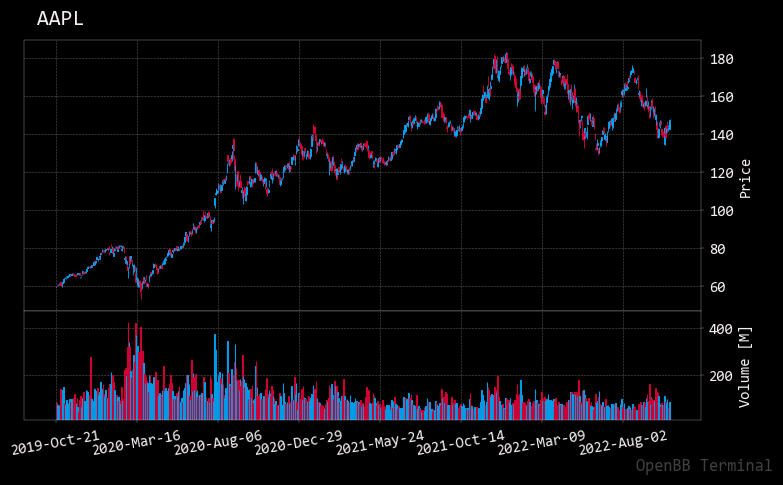

In [6]:
openbb.stocks.candle("AAPL")